<a href="https://colab.research.google.com/github/tarupathak30/machine_learning_algorithms/blob/main/LogisticRegression/GradientDescentLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           random_state=41, hypercube=False, class_sep=20)


In [102]:
import matplotlib.pyplot as plt

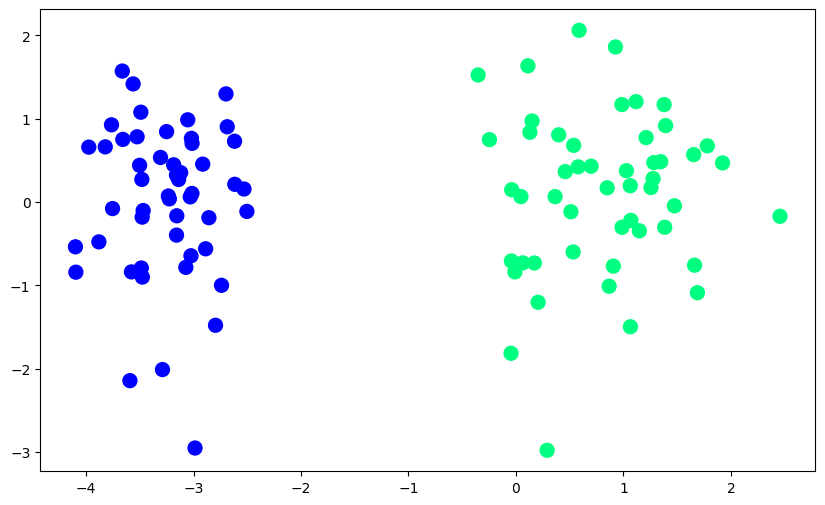

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)

In [104]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='saga')
lor.fit(x, y)

LogisticRegression(penalty=None, solver='saga')

In [105]:
print(lor.coef_)
print(lor.intercept_)

[[4.26071336 0.16215034]]
[4.99730879]


In [106]:
m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
b1 = -(lor.intercept_ / lor.coef_[0][1])

In [107]:
x_input = np.linspace(-3, 3, 100)
y_input = m1 * x_input + b1

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [109]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [110]:
def gradient_descent(x, y):
  x = np.insert(x, 0, 1, axis=1)
  weights = np.ones(x.shape[1])
  learning_rate = 0.1

  for i in range(5000):
    y_hat = sigmoid(np.dot(x, weights))
    weights = weights + learning_rate * (np.dot((y_hat - y), x) / x.shape[0])

  return weights[1:], weights[0]

In [111]:
coef_, intercept_ = gradient_descent(x_scaled, y)
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [112]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

(-3.0, 2.0)

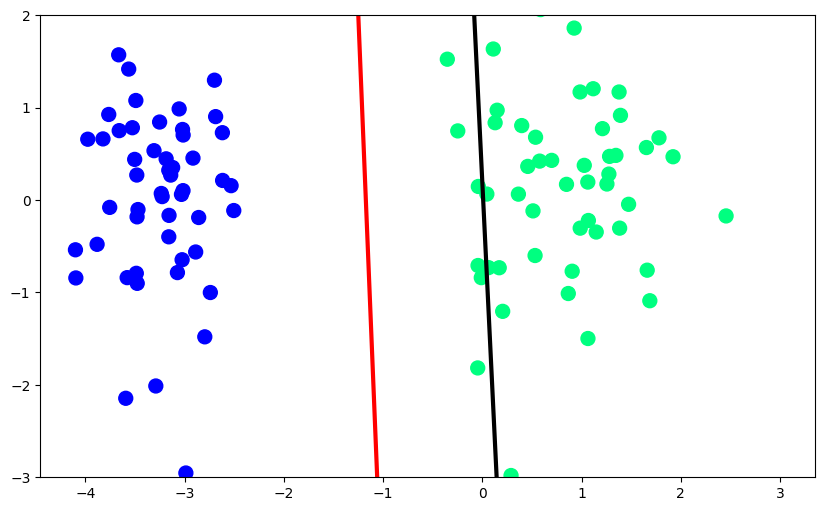

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)
plt.ylim(-3, 2)